# RBM Testing

In [1]:
# setup
%matplotlib inline 
import os
import pylab
import numpy as np
import matplotlib.pyplot as plt
# new version with explicit biases for comparison
from RBM import RBM

plt.rcParams['figure.figsize'] = (15.0, 20.0)
plt.style.use('dark_background') 

# plot flags
PLOT_BIASES = True
PLOT_WEIGHTS = True
PLOT_RECON = True

## Ising model data 

In [2]:
dataOrig = np.load(
    "/home/fineline/projects/MEHTA_project/data"
    "/outputTest30000updates20000samples.npz")['arr_0']

os.chdir("/home/fineline/projects/MEHTA_project/codeRBM")

numSamp, batchSize = dataOrig.shape[0], 100
n_v, n_h = dataOrig.shape[1] * dataOrig.shape[2], 400

data = np.reshape(dataOrig, (numSamp, n_v)).T
# need original data for later, so make copy to feed to rbm (which modifies it)
data1st = np.copy(data)
print("data1st shape = " + str(data1st.shape))

data1st shape = (1600, 20000)


### 1st layer RBM

In [3]:
rbm1st = RBM(n_v, n_h, numSamp, batchSize)
numEpochs, learnRate, regWeight, mom, logInt = 50, 0.1, 0.008, 0.5, 1

In [5]:
## REALLY SLOW. Load data below instead
# train for ___ epochs, with learning rate 0.1
#W_ijs1st, aa1st, bb1st = rbm1st.train(data1st, numEpochs, learnRate, 
#                                      biasesTo0=True, 
#                                      allParams=True, 
#                                      l1RegWeight=regWeight, 
#                                      momentum=mom, 
#                                      log_interval=logInt)
#np.savez_compressed("data/couplingsL1.npz", W_ijs1st, aa1st, bb1st)

100%|██████████| 50/50 [10:54<00:00, 13.09s/it]


In [4]:
W_ijs1st = np.squeeze(np.load("data/couplingsL1.npz")['arr_0'], axis=0)
aa1st    = np.squeeze(np.load("data/couplingsL1.npz")['arr_1'], axis=0)
bb1st    = np.squeeze(np.load("data/couplingsL1.npz")['arr_2'], axis=0)
rbm1st.setParams(W_ijs1st, aa1st, bb1st)

In [5]:
print(W_ijs1st.shape)
print(aa1st.shape)
print(bb1st.shape)

(1600, 400)
(1600, 1)
(400, 1)


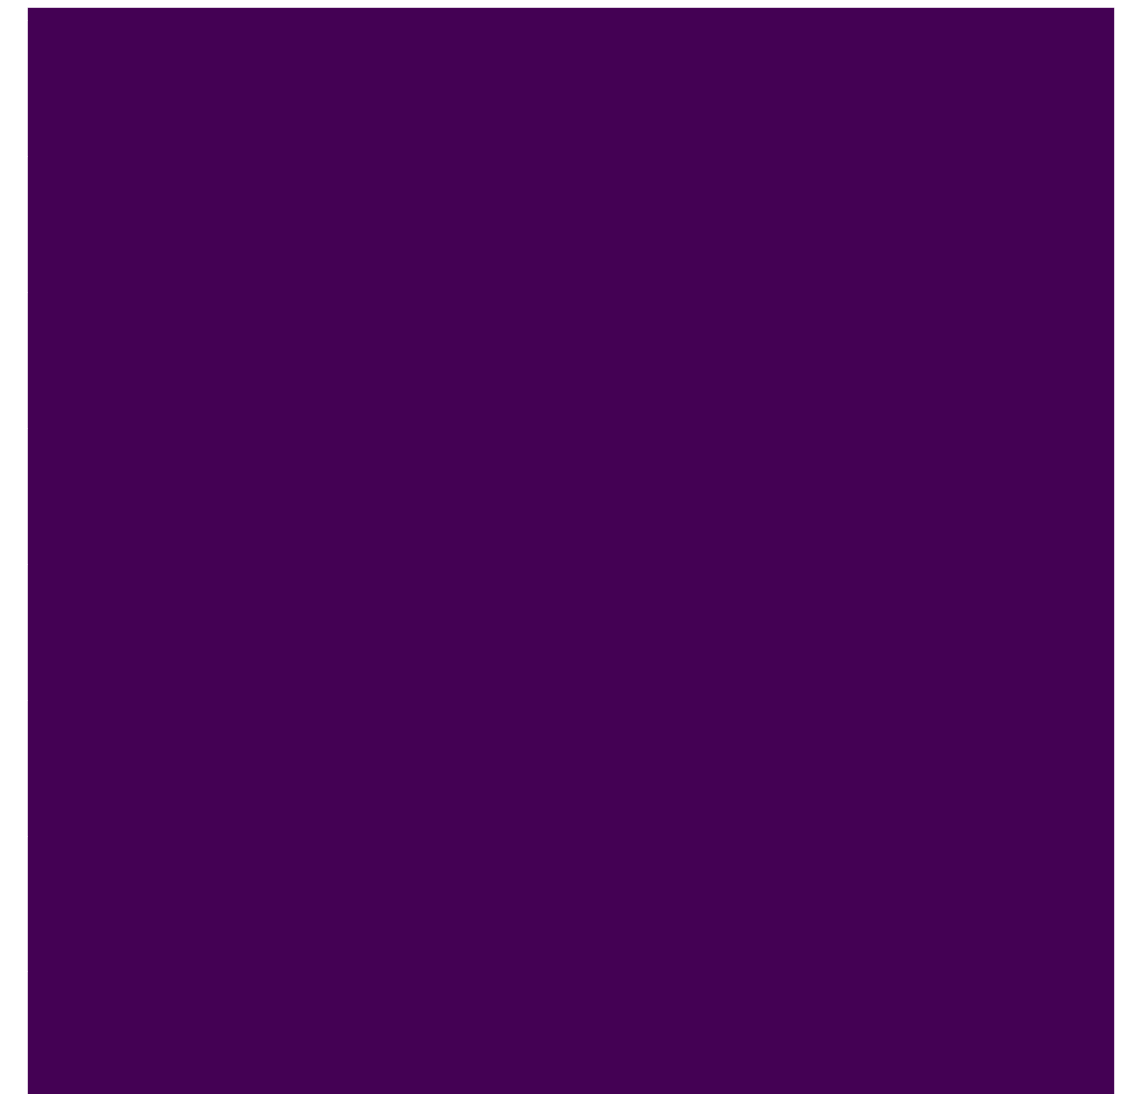

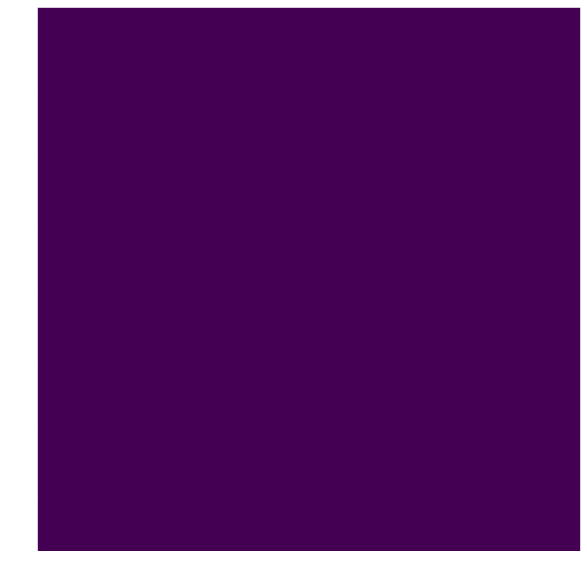

In [6]:
if PLOT_BIASES:
    # Vis unit biases (a)
    plt.rcParams['figure.figsize'] = (20.0, 20.0)
    plt.imshow(aa1st.reshape(40, 40))
    plt.show()
    
    # Hid unit biases (b)
    plt.rcParams['figure.figsize'] = (15.0, 10.0)
    plt.imshow(bb1st.reshape(20, 20))
    plt.show()


wijs1st shape = (400, 1600)


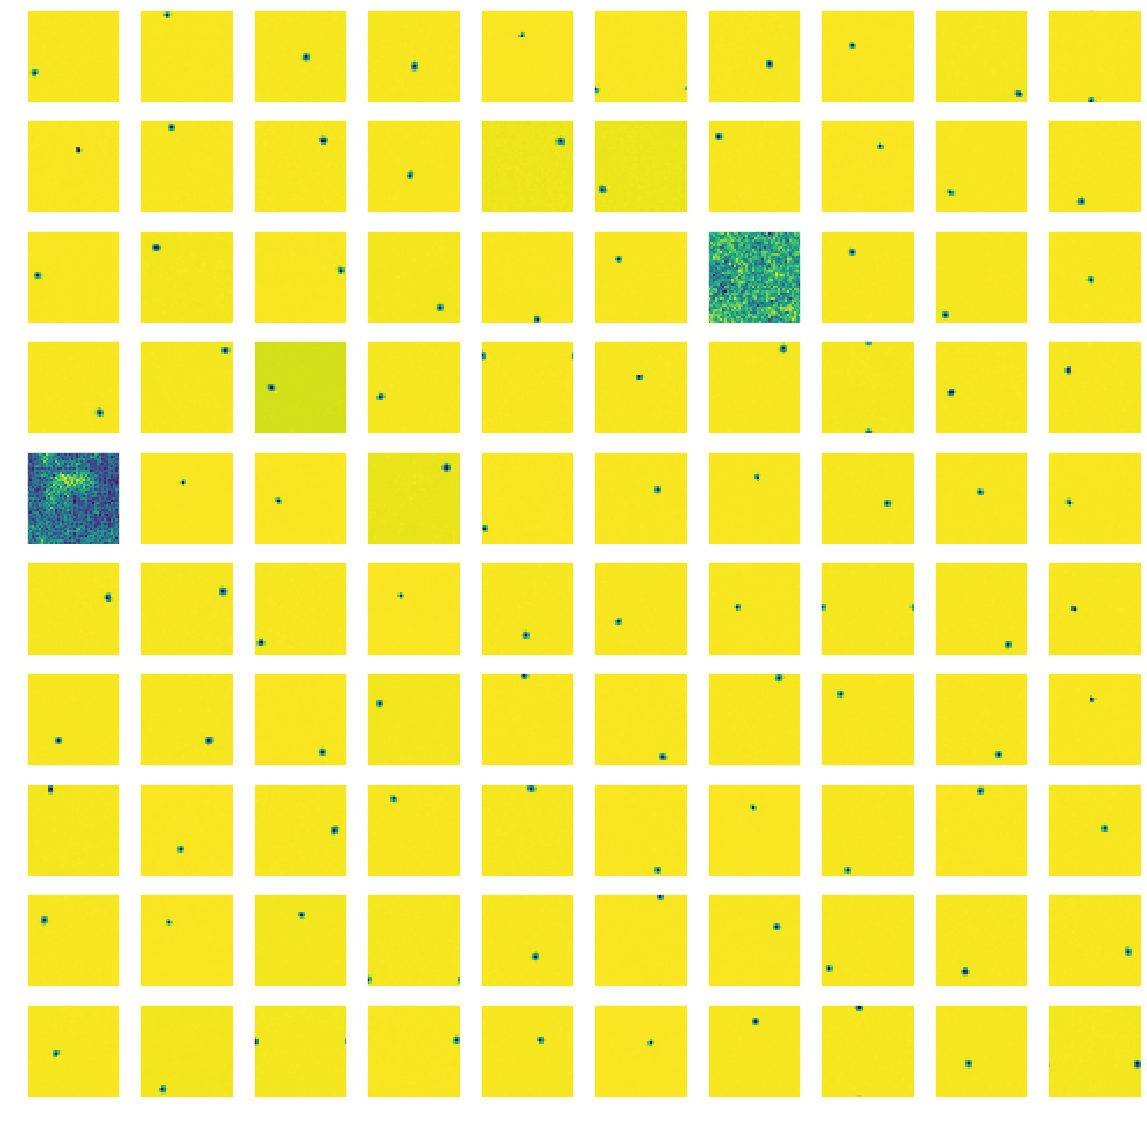

In [6]:
# Plot wijs 
wijs1st = W_ijs1st.T
if PLOT_WEIGHTS:
    plt.rcParams['figure.figsize'] = (20.0, 20.0)
    print("wijs1st shape =", wijs1st.shape)
    for i in range(100):
        plt.subplot(10, 10, i + 1)
        plt.imshow(wijs1st[i].reshape(40, 40))
    plt.show()

### Second layer RBM

In [7]:
# data for input to 2nd layer RBM
data2nd = rbm1st.vToh(data1st)
# setup 2nd RBM
numSamp, batchSize, n_v2, n_h2 = dataOrig.shape[0], 100, 400, 100
rbm2nd = RBM(n_v2, n_h2, numSamp, batchSize)
numEpochs, learnRate, regWeight, mom, logInt = 100, 0.1, 0.008, 0.5, 1

In [10]:
## PRETTY SLOW. Load data below instead
# train for ___ epochs, with learning rate 0.1
#W_ijs2nd, aa2nd, bb2nd = rbm2nd.train(data2nd, numEpochs, learnRate, True, 
#                                      False, regWeight, mom, logInt)
#np.savez_compressed("data/couplingsL2.npz", W_ijs2nd, aa2nd, bb2nd)

100%|██████████| 100/100 [03:57<00:00,  2.37s/it]


In [8]:
W_ijs2nd = np.squeeze(np.load("data/couplingsL2.npz")['arr_0'], axis=0)
aa2nd    = np.squeeze(np.load("data/couplingsL2.npz")['arr_1'], axis=0)
bb2nd    = np.squeeze(np.load("data/couplingsL2.npz")['arr_2'], axis=0)
rbm2nd.setParams(W_ijs2nd, aa2nd, bb2nd)

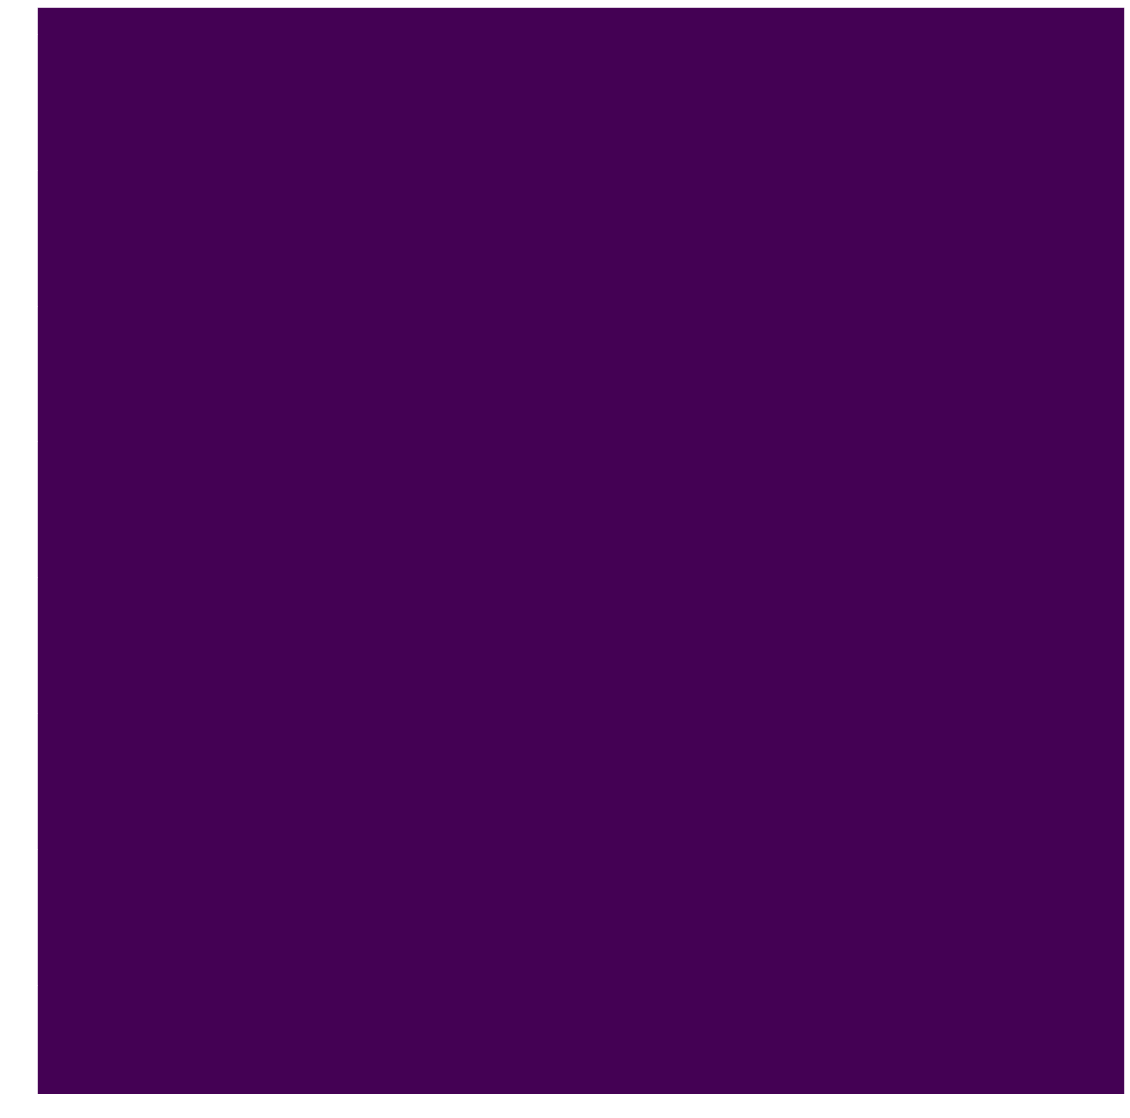

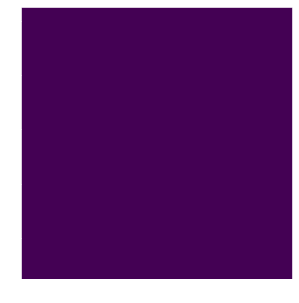

In [9]:
if PLOT_BIASES:
    # Vis unit biases (a)
    plt.rcParams['figure.figsize'] = (20.0, 20.0)
    plt.imshow(aa2nd.reshape(20, 20))
    plt.show()

    # Hid unit biases (b)
    plt.rcParams['figure.figsize'] = (10.0, 5.0)
    plt.imshow(bb2nd.reshape(10, 10))
    plt.show()

wijs2nd shape = (100, 400)


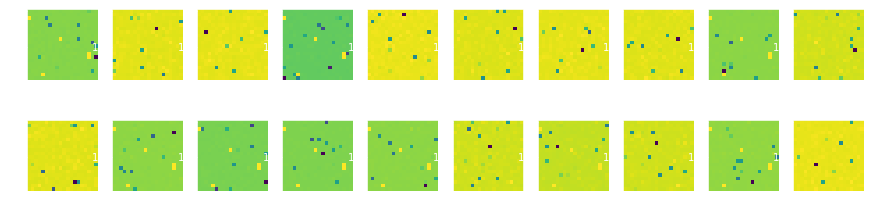

In [10]:
wijs2nd = W_ijs2nd.T
if PLOT_WEIGHTS:
    plt.rcParams['figure.figsize'] = (15.0, 20.0)
    print("wijs2nd shape =", wijs2nd.shape)
    for i in range(20):
        plt.subplot(10, 10, i + 1)
        plt.imshow(wijs2nd[i].reshape(20, 20))
    plt.show()

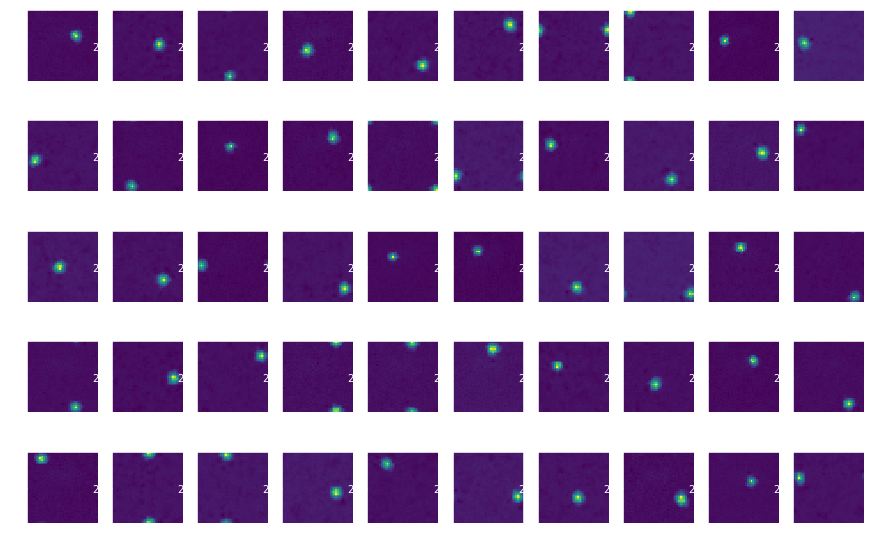

In [11]:
# reconstruction of full receptor fields
recept2nd = [(1 / 4e2) * np.dot(wijs2nd[i, :], wijs1st) for i in range(n_h2)]

if PLOT_RECON:
    plt.rcParams['figure.figsize'] = (15.0, 20.0)
    for i in range(50):
        plt.subplot(10, 10, i + 1)
        plt.imshow(recept2nd[i].reshape(40, 40))
    plt.show()

### Third layer RBM

In [12]:
# data for input to< 3rd layer RBM
data3rd = rbm2nd.vToh(data2nd)
# setup 2nd RBM
numSamp, batchSize, n_v3, n_h3 = dataOrig.shape[0], 100, 100, 25
rbm3rd = RBM(n_v3, n_h3, numSamp, batchSize)
# TODO: do an SMO over these parameters
# numEpochs, learnRate, regWeight, mom, logInt = 100, 0.1, 0.008, 0.6, 1
numEpochs, learnRate, regWeight, mom, logInt = 100, 0.2, 0.0008, 0.9, 1

In [14]:
## SLOWISH. Load data below instead
# train for numEpochs, at learnRate
W_ijs3rd, aa3rd, bb3rd = rbm3rd.train(data3rd, numEpochs, learnRate, True, 
                                      False, regWeight, mom, logInt)
np.savez_compressed("data/couplingsL3.npz", W_ijs3rd, aa3rd, bb3rd)

100%|██████████| 100/100 [00:36<00:00,  2.76it/s]


In [13]:
W_ijs3rd = np.squeeze(np.load("data/couplingsL3.npz")['arr_0'], axis=0)
aa3rd    = np.squeeze(np.load("data/couplingsL3.npz")['arr_1'], axis=0)
bb3rd    = np.squeeze(np.load("data/couplingsL3.npz")['arr_2'], axis=0)
rbm3rd.setParams(W_ijs3rd, aa3rd, bb3rd)

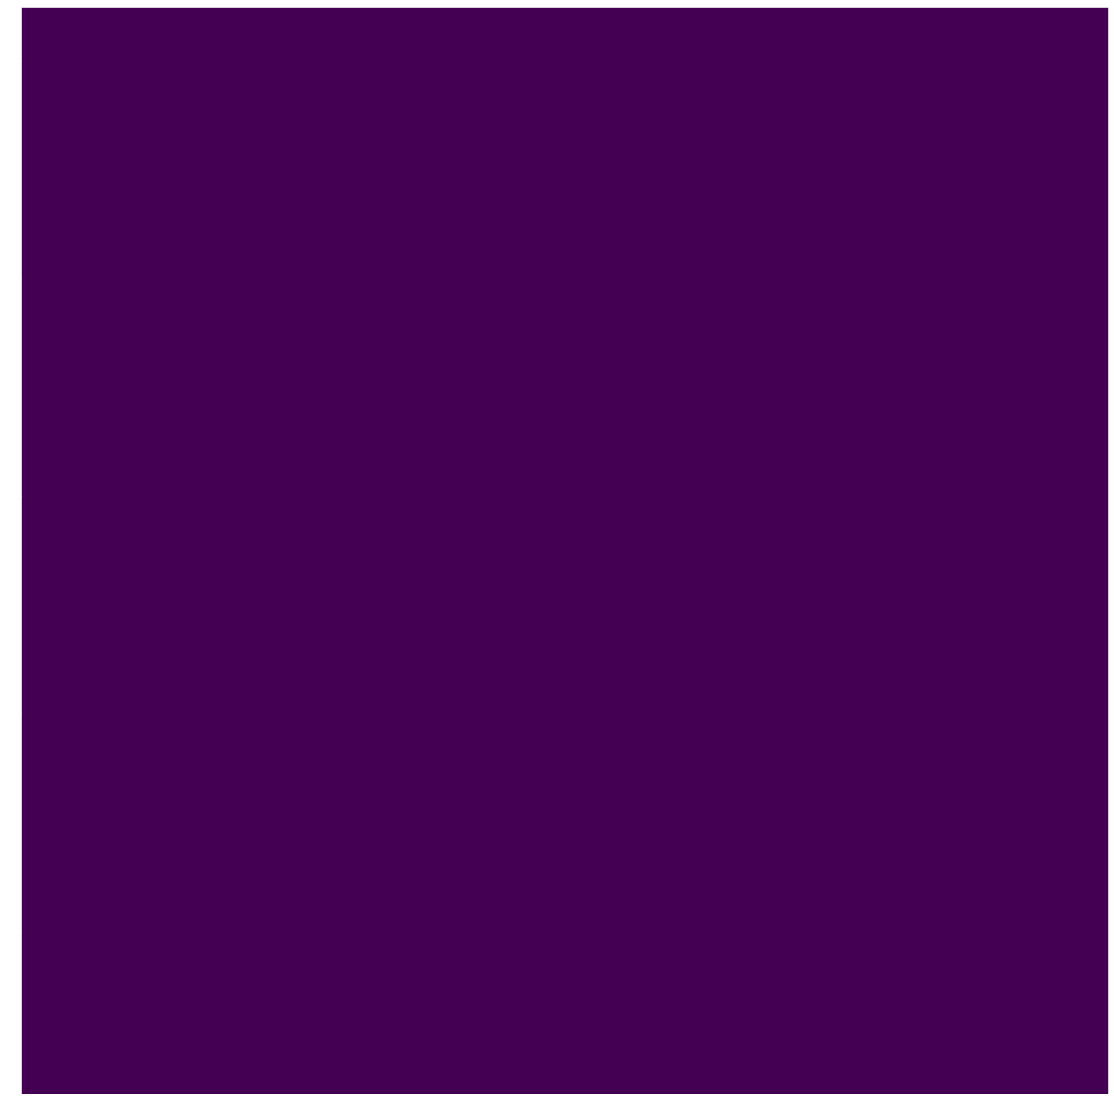

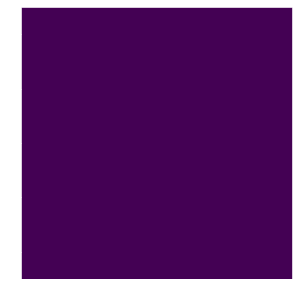

In [14]:
if PLOT_BIASES:
    # Vis unit biases (a)
    plt.rcParams['figure.figsize'] = (20.0, 20.0)
    plt.imshow(aa3rd.reshape(10, 10))
    plt.show()

    # Hid unit biases (b)
    plt.rcParams['figure.figsize'] = (10.0, 5.0)
    plt.imshow(bb3rd.reshape(5, 5))
    plt.show()

wijs3rd shape= (25, 100)


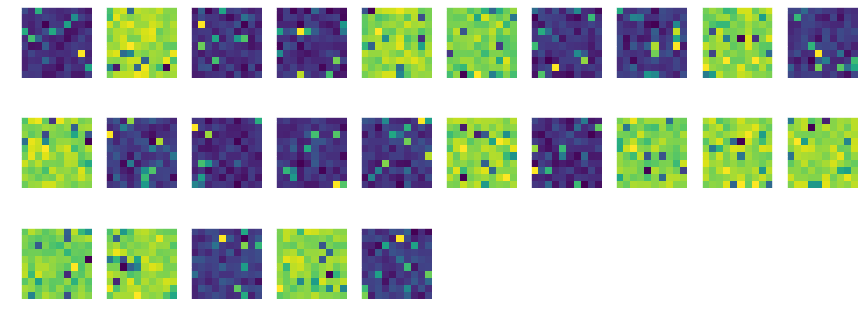

In [15]:
wijs3rd = W_ijs3rd.T
if PLOT_WEIGHTS:
    plt.rcParams['figure.figsize'] = (15.0, 20.0)
    print("wijs3rd shape=", wijs3rd.shape)
    for i in range(25):
        plt.subplot(10, 10, i + 1)
        plt.imshow(wijs3rd[i].reshape(10, 10))
    plt.show()

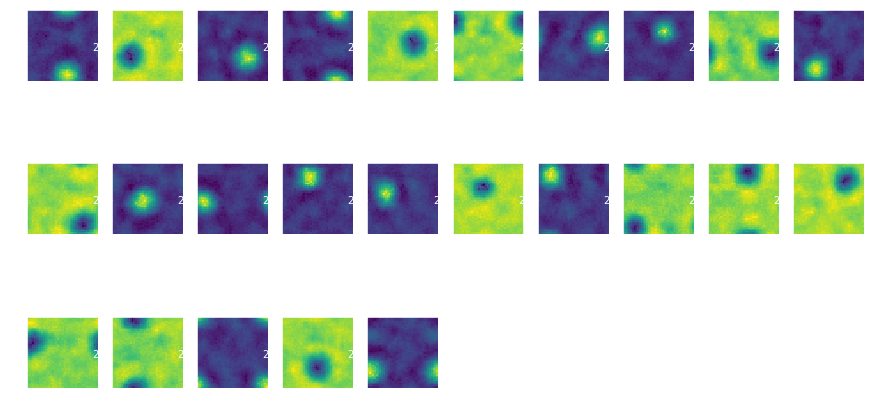

In [16]:
# reconstruction of full receptor fields
recept3rd = [(1 / 4e4) * np.dot(np.dot(wijs3rd[i, :], wijs2nd), wijs1st) for i
             in range(n_h3)]

if PLOT_RECON:
    plt.rcParams['figure.figsize'] = (15.0, 8.0)
    for i in range(25):
        plt.subplot(3, 10, i + 1)
        plt.imshow(recept3rd[i].reshape(40, 40))
    plt.show()

## Reconstruct Data (improperly)

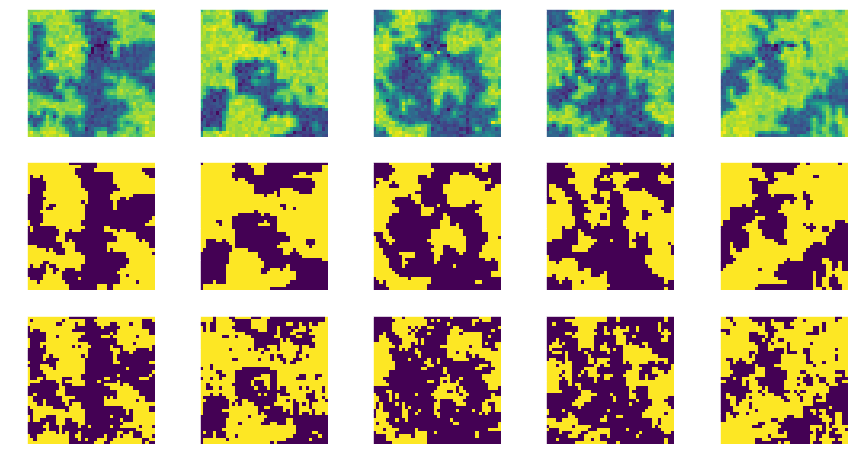

In [17]:
# NB we should only be using the final layer weights (hidL3), and repropagating
# them back through the layers, rather than taking a sum over all layers,
# as we do here.
recon_num = 5
dataL = np.copy(data[:, :recon_num])

hidL1 = rbm1st.vToh(dataL)
hidL2 = rbm2nd.vToh(hidL1)
hidL3 = rbm3rd.vToh(hidL2)

# reconstruction NB: previously I was just using dataReconONE below,
# which only gave the low freq part of the reconstruction. adding
# dataReconTWO and dataReconTHREE gives the higher freq components
dataReconONE = np.dot(wijs1st.T,
                      np.dot(wijs2nd.T, wijs3rd.T.dot(hidL3))).reshape(
    (40, 40, 5))
dataReconTWO = np.dot(wijs1st.T, wijs2nd.T.dot(hidL2)).reshape((40, 40, 5))
dataReconTHREE = wijs1st.T.dot(hidL1).reshape((40, 40, 5))

# Not sure about the numerical weighting factors here...
dataRecon = dataReconONE + 100 * dataReconTWO + 400 * 100 * dataReconTHREE

if PLOT_RECON:
    for i in range(recon_num):
        # reconstructed samples
        plt.subplot(3, recon_num, i + 1)
        plt.imshow(dataRecon[:, :, i])
        # reconstructed samples binarized
        plt.subplot(3, recon_num, i + 1 + recon_num)
        plt.imshow(dataRecon[:, :, i] > 0)
        # original samples
        plt.subplot(3, recon_num, i + 1 + 2 * recon_num)
        plt.imshow(dataL[:, i].reshape(40, 40))
    plt.show()

## Reconstruct Data (properly)

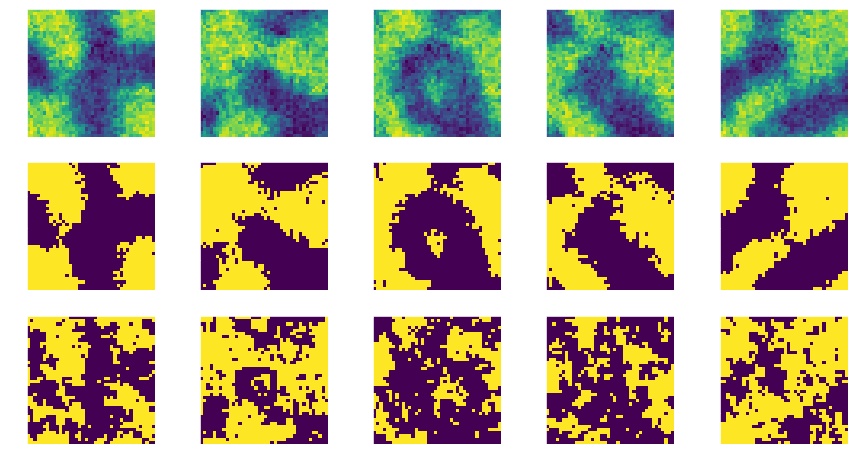

In [18]:
recon_num = 5
dataL = np.copy(data[:, :recon_num])

hidL1 = rbm1st.vToh(dataL)
hidL2 = rbm2nd.vToh(hidL1)
hidL3 = rbm3rd.vToh(hidL2)
hidL2_back = rbm3rd.hTov(hidL3)
hidL1_back = rbm2nd.hTov(hidL2_back)
dataL_back = rbm1st.hTov(hidL1_back)

if PLOT_RECON:
    for i in range(recon_num):
        # reconstructed samples
        dataL_backRes = dataL_back[:, i].reshape(40, 40)
        plt.subplot(3, recon_num, i + 1)
        plt.imshow(dataL_backRes)
        # reconstructed samples binarized
        plt.subplot(3, recon_num, i + 1 + recon_num)
        plt.imshow(dataL_backRes > 0.5)
        # original samples
        plt.subplot(3, recon_num, i + 1 + 2 * recon_num)
        plt.imshow(dataL[:, i].reshape(40, 40))
    plt.show()

## TODO: Implement below

NameError: name 'rbm' is not defined

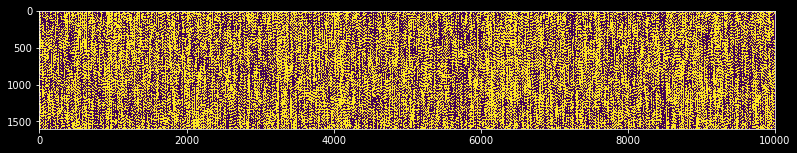

NameError: name 'rbm' is not defined

In [97]:
plt.rcParams['figure.figsize'] = (29.0, 20.0.reshape(40, 40))
plt.subplot(1, 2, 1)
plt.imshow(data)

dataCop2=np.zeros(data.shape)
np.copyto(dataCop2, data)
hidActs = rbm.vToh(dataCop2)
plt.subplot(1, 2, 2)
plt.imshow(hidActs)